# Learning World Models

## Introduction

Hopefully, I've convinced you that although formulating decision-making problems as POMDPs presents challenges in representation and computation, they offer a way to better represent real-world tasks. Moreover, they align more naturally with how we build deployed autonomous systems that already account for sensor and motion models for low-level control.
>
Various works have demonstrated how to successfully learn world models using deep learning, most notably [1] and [2]. In this notebook, I will introduce one specific flavor, the main topic of my research, which is neuro-symbolic world models. Where we target discrete/categorical latent representations rather than learning a continuous latent space (like commonly done in standard Variational Autoencoders). In short, neuro-symbolic world models attempt to capture a minimal and symbolic set of rules that describe the state of the world. For a more in-depth discussion on neuro-symbolic approaches in general, see [3]. I'm particularly interested in these types of approaches as I believe they provide manageable representations for Validation & Verification for decision-making, crucial in developing and deploying autonomous systems in critical environments. By extension, I believe these will lead to safer and more interpretable embodied intelligent systems.

## Notebook Objectives

- Learn a simple world model
- Explore the discrete latent representations
- Train a simple Deep RL policy using the learned world model

## References

[1] D. Ha and J. Schmidhuber, “Recurrent world models facilitate policy evolution,” 2018.

[2] D. Hafner, J. Ba, M. Norouzi, and T. Lillicrap, “Mastering atari with discrete world models,” 2021.

[3] https://harshakokel.com/posts/neurosymbolic-systems/ 

In [1]:
from confs.instances import (wm_env_config, eval_wm_env_config, wm_training_config, wm_config, dynaq_config, model_based_config)
from helpers.check_dev_env import check_device
from helpers.env_utils import load_env
from helpers.metrics_utils import Metrics, TrainingCallback, MetricTracker
from helpers.visualization_utils import plot_episode_rewards, training_plots, plot_samples
from models.world_model import WorldModel, sample_from_latent
from models.dynaq import DynaQ
from agents.random import RandomAgent
from agents.model_based import ModelBasedAgent

import torch 
from os import path
import tqdm
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from IPython.display import Video

Using device: cpu


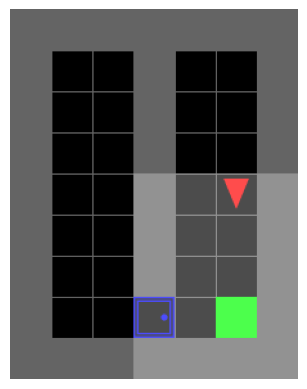

In [2]:
device = check_device()

env = load_env(wm_env_config)
observation, info = env.reset()
random_agent= RandomAgent(env.unwrapped.valid_actions)
env.show_render()

## Learning a World Model

Total episodes collected: 200
Total steps collected: 13,327
Avg. steps/episode: 66.635
Percent goal reached: 50.0%
Proposed Class Weights:  tensor([1.0000, 1.3544, 1.2700, 1.0000, 5.5036, 1.0000, 1.0000, 1.0000, 6.9838,
        1.0000, 1.0000]) size: torch.Size([11])
Total Trainable Params 39,246
Total Params 39,246


Training, Epoch: [1/10] | Total loss: 3.1213939 -- O_recon: 0.8845621 --  O_kld: 0.4139252 -- T_loss: 1.8228893 -- R_loss: 0.0000175: 100%|██████████| 1333/1333 [00:12<00:00, 106.63it/s]


NextObs acc: 82.88% -- Obs acc: 82.83% -- predObs acc: 69.39% 

	updated temperature: 0.600
	current learning rate: 9.000e-03


Training, Epoch: [2/10] | Total loss: 2.2372673 -- O_recon: 0.6229724 --  O_kld: 0.4524696 -- T_loss: 1.1594859 -- R_loss: 0.0023391: 100%|██████████| 1333/1333 [00:12<00:00, 107.93it/s]


NextObs acc: 92.46% -- Obs acc: 92.50% -- predObs acc: 83.21% 

	updated temperature: 0.600
	current learning rate: 8.100e-03


Training, Epoch: [3/10] | Total loss: 1.9885306 -- O_recon: 0.7276415 --  O_kld: 0.3204308 -- T_loss: 0.9404566 -- R_loss: 0.0000018: 100%|██████████| 1333/1333 [00:12<00:00, 107.52it/s]


NextObs acc: 92.72% -- Obs acc: 92.72% -- predObs acc: 83.87% 

	updated temperature: 0.600
	current learning rate: 7.290e-03


Training, Epoch: [4/10] | Total loss: 2.1334114 -- O_recon: 0.8379959 --  O_kld: 0.3239476 -- T_loss: 0.9707923 -- R_loss: 0.0006757: 100%|██████████| 1333/1333 [00:12<00:00, 107.28it/s]


NextObs acc: 92.99% -- Obs acc: 92.96% -- predObs acc: 83.86% 

	updated temperature: 0.600
	current learning rate: 6.561e-03


Training, Epoch: [5/10] | Total loss: 1.9936321 -- O_recon: 0.8156400 --  O_kld: 0.4457262 -- T_loss: 0.7321874 -- R_loss: 0.0000784: 100%|██████████| 1333/1333 [00:12<00:00, 107.54it/s]


NextObs acc: 93.27% -- Obs acc: 93.26% -- predObs acc: 84.32% 

	updated temperature: 0.600
	current learning rate: 5.905e-03


Training, Epoch: [6/10] | Total loss: 1.7669994 -- O_recon: 0.6799270 --  O_kld: 0.3234423 -- T_loss: 0.7636280 -- R_loss: 0.0000020: 100%|██████████| 1333/1333 [00:12<00:00, 105.56it/s]


NextObs acc: 93.24% -- Obs acc: 93.21% -- predObs acc: 84.36% 

	updated temperature: 0.600
	current learning rate: 5.314e-03


Training, Epoch: [7/10] | Total loss: 2.5673747 -- O_recon: 0.7900184 --  O_kld: 0.3946823 -- T_loss: 1.3826548 -- R_loss: 0.0000190: 100%|██████████| 1333/1333 [00:12<00:00, 107.95it/s]


NextObs acc: 93.40% -- Obs acc: 93.34% -- predObs acc: 84.19% 

	updated temperature: 0.600
	current learning rate: 4.783e-03


Training, Epoch: [8/10] | Total loss: 2.5550420 -- O_recon: 0.8792852 --  O_kld: 0.3493224 -- T_loss: 1.3262004 -- R_loss: 0.0002339: 100%|██████████| 1333/1333 [00:12<00:00, 106.29it/s]


NextObs acc: 92.82% -- Obs acc: 92.83% -- predObs acc: 83.82% 

	updated temperature: 0.600
	current learning rate: 4.305e-03


Training, Epoch: [9/10] | Total loss: 2.4974127 -- O_recon: 0.8971925 --  O_kld: 0.3059340 -- T_loss: 1.2942604 -- R_loss: 0.0000258: 100%|██████████| 1333/1333 [00:12<00:00, 107.43it/s]


NextObs acc: 91.57% -- Obs acc: 91.54% -- predObs acc: 80.74% 

	updated temperature: 0.600
	current learning rate: 3.874e-03


Training, Epoch: [10/10] | Total loss: 2.3431284 -- O_recon: 0.7681122 --  O_kld: 0.3279569 -- T_loss: 1.2470349 -- R_loss: 0.0000245: 100%|██████████| 1333/1333 [00:12<00:00, 106.40it/s]


NextObs acc: 91.57% -- Obs acc: 91.55% -- predObs acc: 81.07% 

	updated temperature: 0.600
	current learning rate: 3.487e-03


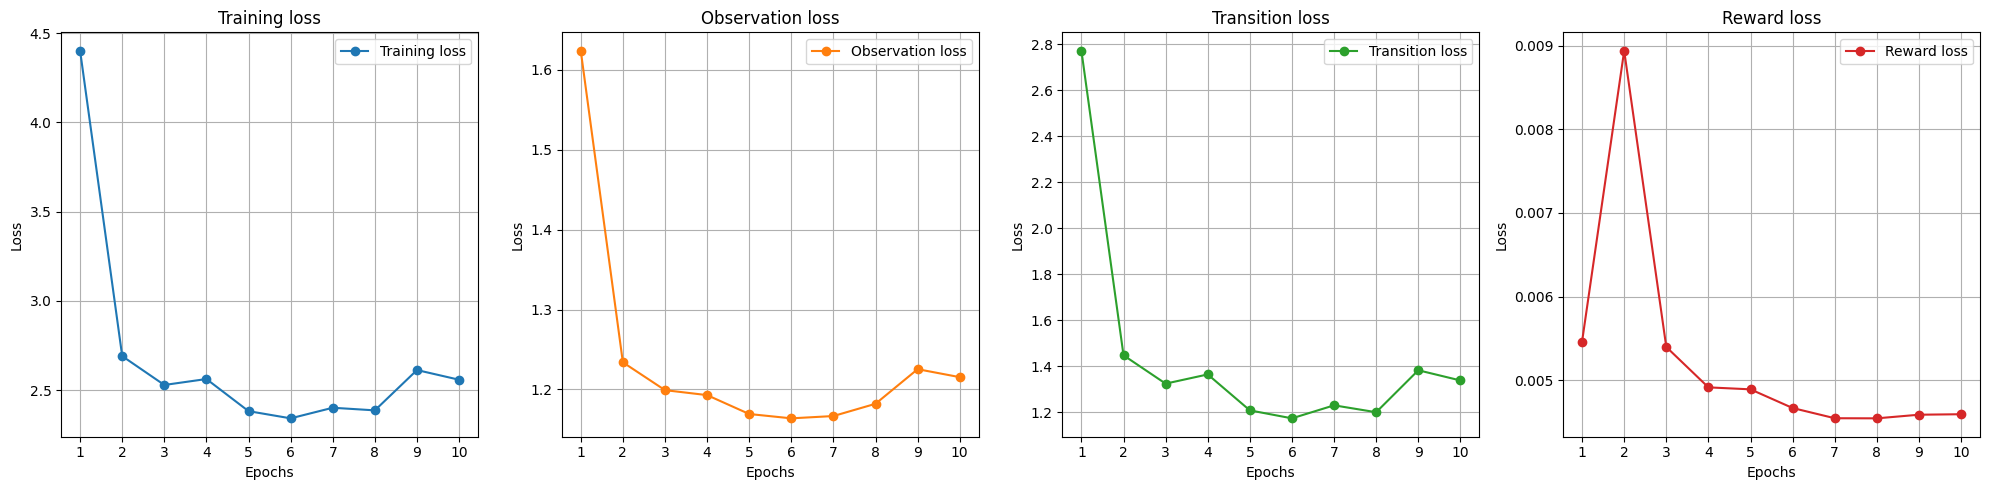

In [3]:
metrics = Metrics()
wm_warmup_metric_callback = TrainingCallback(metrics, 'world_model_warm-up')

# warm-up world model using experiences collected by a random polciy
model, model_optimizer = WorldModel.warm_up(wm_config, 
											wm_training_config, 
											env, 
											random_agent, 
											wm_warmup_metric_callback,
                                            device=device)

training_plots(metrics['world_model_warm-up'])

## Latent Discrete Representations

### Using a Uniform Prior Distribution

using temperature 0.6


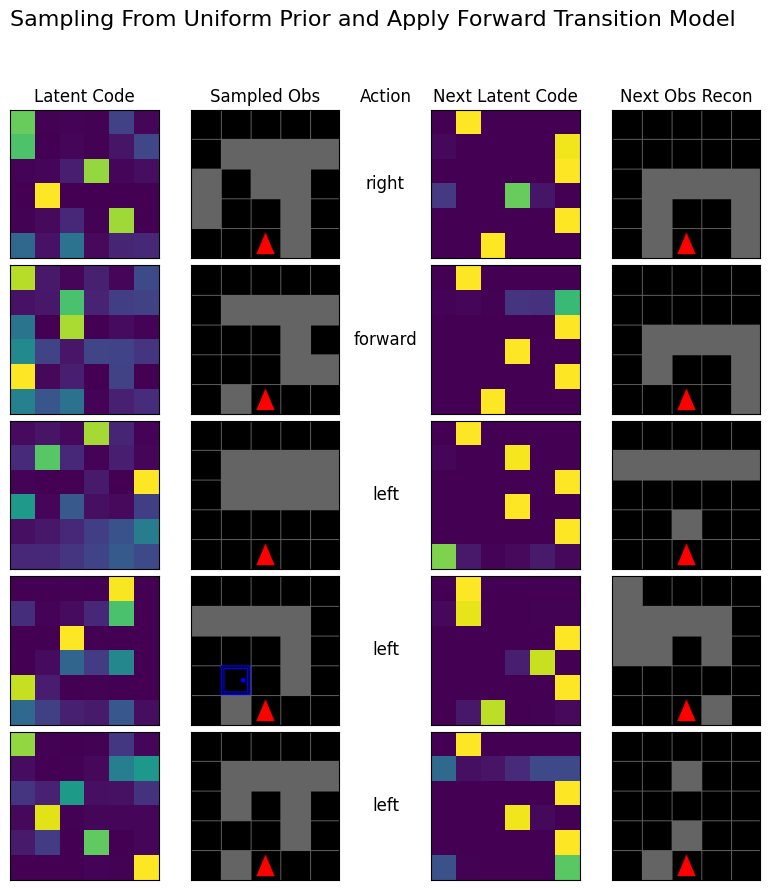

In [4]:
from importlib import reload
from helpers import visualization_utils
reload(visualization_utils)
from helpers.visualization_utils import plot_samples


num_samples = 5 
random_actions = [random_agent.act() for _ in range(num_samples)]

samples = sample_from_latent(model, random_actions, prior_type='uniform', convert_output_to_array=True, device=device)
plot_samples(env, samples, title='Sampling From Uniform Prior and Apply Forward Transition Model')

### Using the Learned Prior Distribution

using temperature 0.6


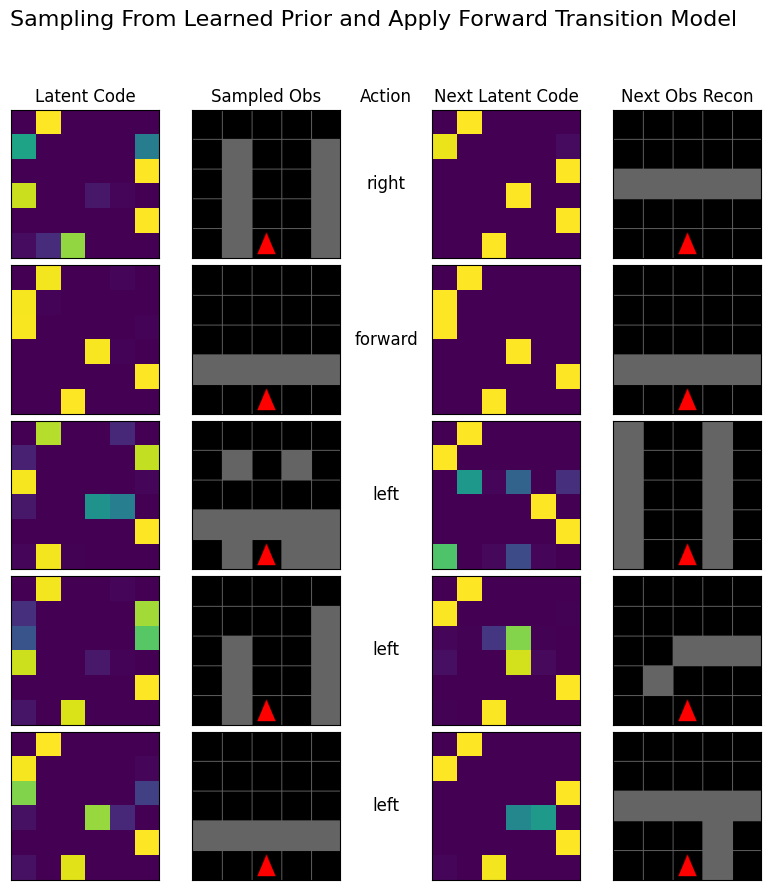

In [5]:
samples = sample_from_latent(model, random_actions, prior_type='learned', convert_output_to_array=True, device=device)
plot_samples(env, samples, title='Sampling From Learned Prior and Apply Forward Transition Model')

## Training Dyna-Q

In [6]:
# initialize metrics
metrics = Metrics()
metric_callback = TrainingCallback(metrics, 'dynaq')
wm_metric_callback = TrainingCallback(metrics, 'world_model_fine-tune')
run_metrics_tracker = MetricTracker()

video_path = 'videos/03-learning_world_models/dynaq/'
video_name_prefix = 'training'
save_video_freq = 200
num_episodes = 1500

run_env = RecordVideo(env, 
					 video_folder=video_path, 
					 name_prefix=video_name_prefix, disable_logger=True,
                  episode_trigger=lambda x: (x % save_video_freq == 0) or (x == num_episodes-1))

# instantiate model
policy = DynaQ(dynaq_config, action_embed_fn=model.transition_model.ActionEmbedding, device=device)

# initialize agent 
agent = ModelBasedAgent(model_based_config,
						policy=policy, 
						model=model, 
						model_optimizer=model_optimizer,
						policy_metrics_callback=metric_callback,
						model_metrics_callback=wm_metric_callback,
						device=device)

rewards = []

starting_curriculum = 0.7
min_curriculum = 0.5
curriculum_decay = 0.001
run_env.unwrapped.set_curriculum(starting_curriculum)
curriculum = getattr(run_env, 'curriculum_learning_prob')
print('curriculum at start: {}'.format(curriculum))

# environment loop
pbar = tqdm.tqdm(range(num_episodes), desc='Running episode')
for episode in pbar:

	obs, info = run_env.reset()
	done = False
	total_reward = 0
	step = 0
	
	while not done:
		
		action = agent.act(obs)
		next_obs, reward, terminated, truncated, info = run_env.step(action=action)

		# Update Q-function
		agent.update_policy(obs, action, reward, next_obs, terminated)
		
		# Optional: Continue updating world model
		# agent.update_model(obs, action, reward, next_obs, terminated)
		
		# Optional: Perform Mental Simulation to further improve Q-function
		agent.mental_simulation()

		step += 1
		obs = next_obs
		total_reward += reward
		done = terminated or truncated
		run_metrics_tracker.track('reward', reward, episode, step)		
		
		if done:
			break
	
	# reduce curriculum
	curriculum = max(min_curriculum, curriculum - curriculum_decay)
	run_env.unwrapped.set_curriculum(curriculum)
	
	rewards.append(reward)
	pbar.set_description('Episode [{}/{}] , Total Reward: {:.5f}'.format(episode + 1, num_episodes, total_reward))

print('ending curriculum: {}'.format(curriculum))

metric_callback('episode_reward', run_metrics_tracker.get_episode_total_reward('reward'))
episode_rewards = metrics['dynaq']['episode_reward']

curriculum at start: 0.7


Episode [1500/1500] , Total Reward: 0.00000: 100%|██████████| 1500/1500 [02:13<00:00, 11.23it/s]

ending curriculum: 0.5


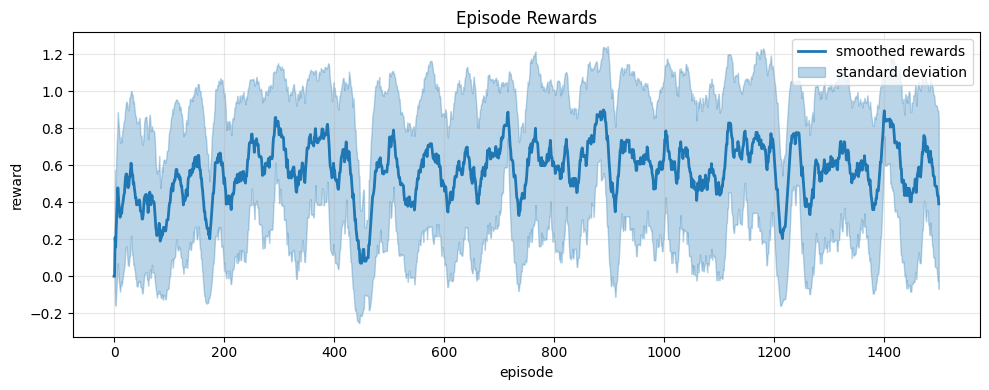

In [7]:
plot_episode_rewards(episode_rewards)


video_full_path = path.join(video_path,'{}-episode-{}.mp4'.format(video_name_prefix, num_episodes-1))
Video(video_full_path)

# you can convert videos to gif using ffmpeg: `ffmpeg -i in.mp4 out.gif`

## Evaluate Dyna-Q 

In [8]:
video_path = 'videos/03-learning_world_models/dynaq/'
video_name_prefix = 'eval'
save_video_freq = 100
num_episodes = 500

env = load_env(eval_wm_env_config)
eval_env = RecordVideo(env, 
					 video_folder=video_path, 
					 name_prefix=video_name_prefix, disable_logger=True,
                  episode_trigger=lambda x: (x % save_video_freq == 0) or (x == num_episodes-1))

# environment loop
pbar = tqdm.tqdm(range(num_episodes), desc='Running episode')
for episode in pbar:

	obs, info = eval_env.reset()
	done = False
	total_reward = 0
	step = 0

	while not done:
		
		with torch.no_grad():
			action = agent.act(obs)
		next_obs, reward, terminated, truncated, info = eval_env.step(action=action)

		step += 1
		obs = next_obs
		total_reward += reward
		done = terminated or truncated
		
		if done:
			break

Running episode: 100%|██████████| 500/500 [00:19<00:00, 26.11it/s]
